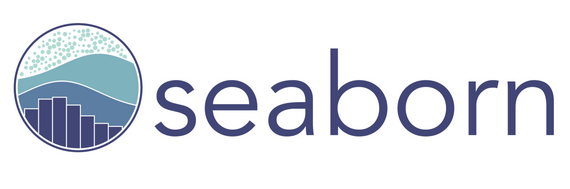

Seaborn comes with a number of datasets; In this example, we utilize the data from tips dataset

Tips dataset contains the data from a restaurant. It has 7 columns that capture the 

- Total_bill 
- Tip rendered,
- Sex 
- Smoker/non-Smoker
- Day of the week
- Time of the day  
- Size of the table.


**The first 5 lines of the data set** 

In [1]:
import seaborn as sns
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


 <font color = blue> **DISTRIBUTION PLOTS**

- A distribution plot comprises of 3 plots each of which may be toggled ON or OFF. 
- By default, Histogram and KDE are set to ON , whereas RUG Plot is set to OFF .
- The KDE or histogram may be turned OFF by specifying kde=False or hist=False argument respectively. 
- Likewise, RUG plot can be turned ON, using rug=True argument
- Individual plots within a Distribution plot can be further customized. 
- The custom parameters are specified as a dictionary — key:value pair. In the below example, we’ve the 3 plots   set to ON.


There are five preset seaborn themes: darkgrid, whitegrid, dark, white, and ticks.
Below, I set the theme as dark

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


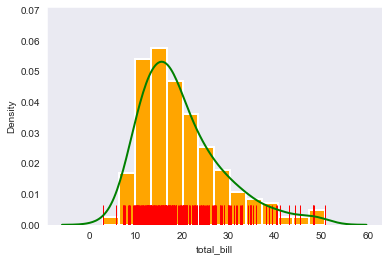

In [2]:
sns.set_style("dark")
sns.distplot(tips['total_bill']
             , hist_kws={"linewidth":2,"alpha": 1,"color": "orange"}
             , kde = True
             , kde_kws={"color":"g", "lw":2}
             , rug=True
             , rug_kws={"color":"red","height":0.09}
             );

 <font color = blue> **JOINT PLOTS**


- A Joint Plot allows matching of 2 dist plots for bi-variate data.
- Bivariate analysis is one of the simplest forms of quantitative analysis. 
- It involves the analysis of two variables (often denoted as X, Y), for the purpose of 
  determining the empirical relationship between them .
  https://seaborn.pydata.org/generated/seaborn.jointplot.html




- From the tips data set; plot the total_bill and tip; to try and understand a relation ship
  between the bivariate data columns
- The scatter plots shows us the relationsip between the 2 values.
- At the edge, the histogram - shows frequency distribution of the 2 variables.


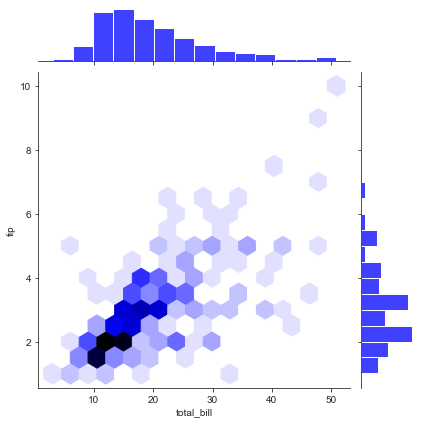

In [3]:
sns.set_style("ticks")
sns.jointplot(x='total_bill'
              , y='tip'
              , data=tips
              , kind ='hex'
              ,color ='blue');

<font color = blue> **PAIR PLOTS**

A pair plot is a 2D categorical scatter plot that represents the pair wise relationship 
between the numerical variables in a data frame.For a dataset with N numerical values, 
it plots Nc2 i.e n!/2!*(n-2)! plots. Pair Plots are useful when the number of numerical 
variables is high, though it is not useful for representing higher dimensional data.


In the dataframe, there are 3 numerical values, and hence it returns
3!/(2!*1!) = 3 plots. The plot above the diagonal is a mirror of the
plots below the diagonal (the x and y axis get interchanged). 
So, there are 3 distinct plots.

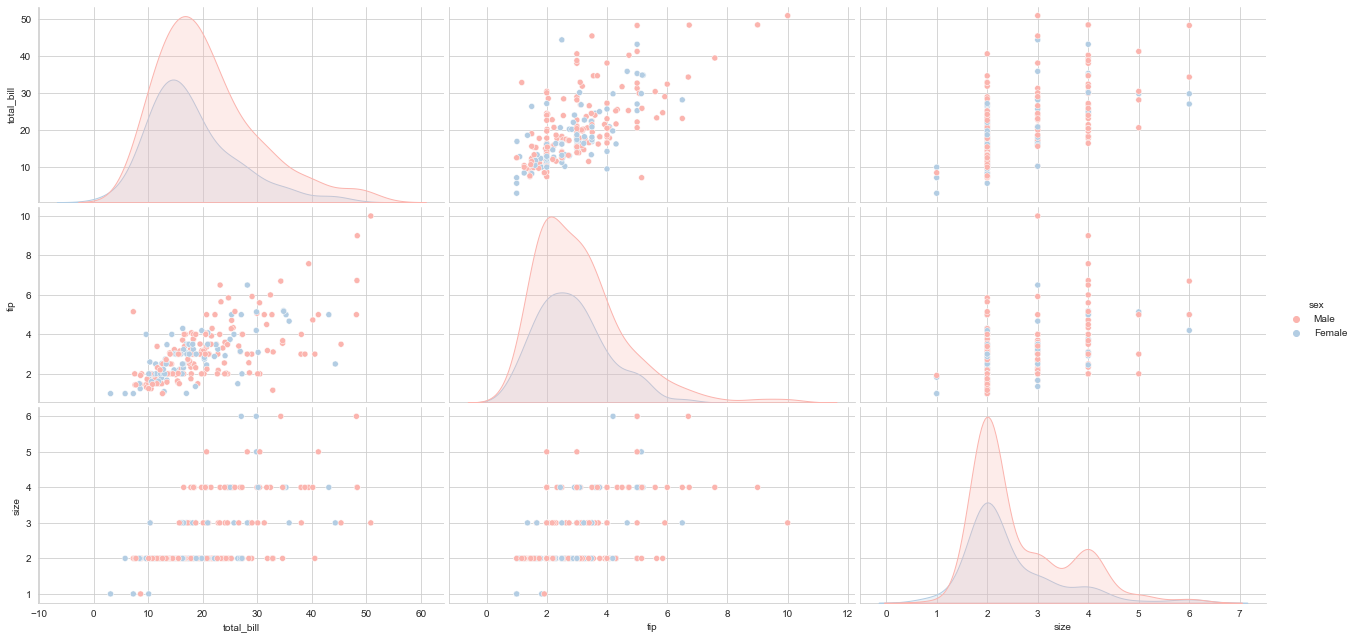

In [4]:
#Choose color palette
sns.set_palette("Pastel1")

#choose the grid style
sns.set_style("whitegrid")

#height implies the size of the plot; and hue is used to separate categorical values.
sns.pairplot(tips
             ,hue='sex'
             ,diag_kind='auto'
             , height=3
             , aspect=2)

<font color = blue>**CUSTOMIZED PAIR PLOT**
-- <font color = black>Plot the total_bill against tip

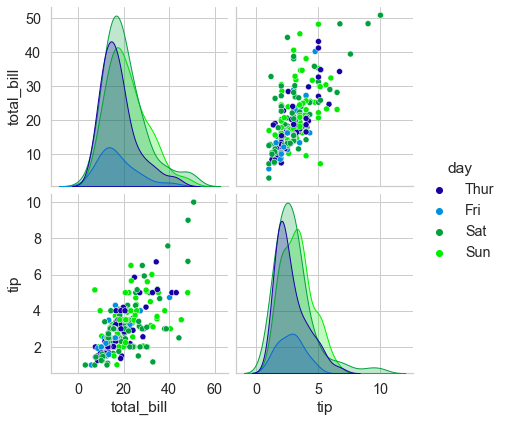

In [18]:
#choose the palette
sns.set_palette('nipy_spectral')

#choose style
sns.set_style("whitegrid")

#Specify the dataset, the columns from the dataset as a list, customize 
#the size and choose the categorical variable 
sns.pairplot(tips
             , vars =['total_bill','tip']
             , height =3
             , hue ='day');

**Reduce down to a scatter plot**

In [20]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
#choose the palette
sns.set_palette("gist_rainbow") 

#choose the grid-style
sns.set_style("white")

#Define the dataset; explicitly specify the X and Y column values, the categorical variable& dimension
sns.pairplot(tips
             , x_vars=tips['total_bill']
             , y_vars=tips['tip']
             , hue='smoker'
             , height =4
             , aspect=2);

<font color = blue>**BOX AND WHISKER PLOT**


**Also, referred to as a 5 point summary plot or a Box plot. 
It is a categorical plot that provides with 5 critical estimators of any given distribution.**
- Median (middle value)
- 1st quartile (25th Percentile)
- 3rd quartile (75th Percentile)
- Minimum
- Maximum

**There is a certain calculation; based on which a Box and Whisker treats datapoints beyond a ceratin range as
an outlier**

- Outliers on the higher side Q3 + (1.5 * IQR), 
- Outliers on the lower side is Q1 — (1.5*IQR). 
- IQR stands for Inter quartile range and is the difference between the Q3 & Q1 values. 
    - In this case 21.75–12.095 = 9.655. 
- Any value beyond (21.75 + 9.655) = 31.405 is treated as an outlier. 
- 40.17 is way way way far away from 31.04, no wonder the plot treats the data point as an outlier.


**A Box and whisker plot for the entire range of data**

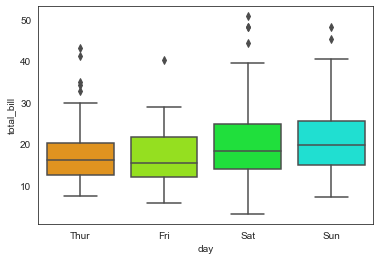

In [7]:
sns.boxplot(x='day'
            , y='total_bill'
            , data=tips);

**Let us dive deep into analyzing a Box and whisker plot**

Let's zero down to the day with least number of customers visiting the restaurant - which is **Friday**

In [8]:
byday = tips.groupby('day')
byday.count()

,total_bill,tip,sex,smoker,time,size
day,,,,,,
Thur,62,62,62,62,62,62
Fri,19,19,19,19,19,19
Sat,87,87,87,87,87,87
Sun,76,76,76,76,76,76


Distribution of datapoints for Friday

In [9]:
tips[tips['day']=='Fri'][['day','total_bill','sex']].describe()

,total_bill
count,19.000000
mean,17.151579
std,8.302660
min,5.750000
25%,12.095000
50%,15.380000
75%,21.750000
max,40.170000


Now, I shall leave this to you; so you may tally the numbers with the plot ..Easy peazy !!
In case; you're wondering about the two different plots. The argument hue which maps to 'sex' helps
split categorical data (male/female)

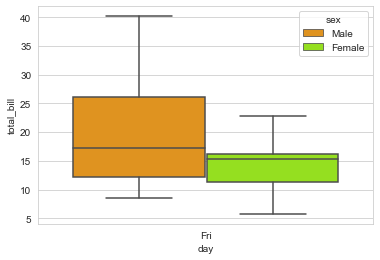

In [10]:
sns.set_style('whitegrid')
sns.boxplot(x='day'
            , y='total_bill'
            , data=(tips[tips['day']=='Fri'][['day','total_bill','sex']])
            , order=['Fri']
            ,hue ='sex');

<font color = blue>**VIOLIN PLOT**


- A violin plot helps represent comparison of a variable distribution across "categories" .
- A violin plot differs from a Box plot in a way that it provides with the density distribution of data points


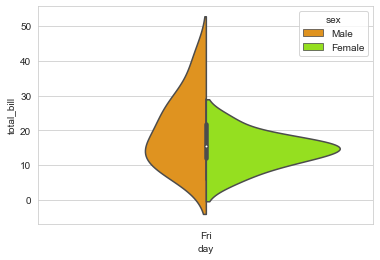

In [11]:
sns.violinplot(x='day'
               , y ='total_bill'
               , data =(tips[tips['day'] =='Fri'][['day','total_bill','sex']])
               ,split=True
               ,hue='sex'
               ,order=['Fri']);

<font color = blue>**SCATTER, STRIP & SWARM PLOTS**


- Strip plots are a good alternative to Scatter plots when visually capturing all, especially overlapping data points in an observation. 
- Unlike a scatter plot, where 2 similar data points are superimposed, a strip plot juxtaposes the values (argument — jitter=‘True’)


<font color = blue>**SCATTER PLOTS**

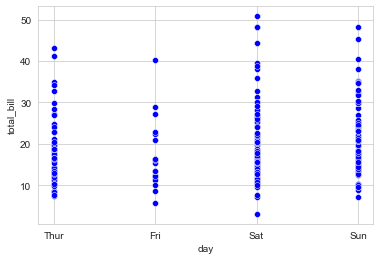

In [12]:
sns.scatterplot(x='day', y ='total_bill', data=tips, color = 'blue');

<font color = blue>**STRIP PLOTS**
<font color = black>-- Same data as above

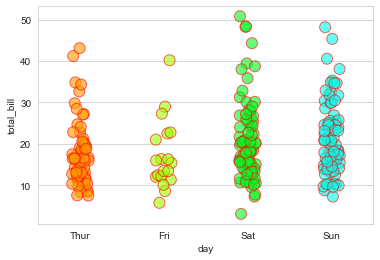

In [13]:
sns.stripplot(x='day'
              , y ='total_bill'
              , data =tips
              , jitter=True
              , alpha=0.6
              , size=11
              , edgecolor ='red'
              , linewidth=1);

<font color = blue>**SWARM PLOTS**


- The plots resemble a swarm of bees and hence the name. 
- A swarm plot is a categorical scatter plot, similar to a strip plot except that 
- the location of points are automatically adjusted to avoid overlap even if the jitter value is not applied.


C:\Users\Admin\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 20.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 5.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


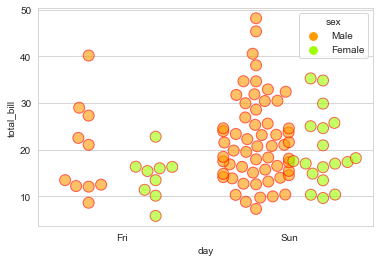

In [14]:
sns.swarmplot(x='day'
              , y ='total_bill'
              , data =tips
              , alpha=0.6
              , size=11 
              , order =['Fri','Sun']
              , edgecolor ='red'
              , hue ='sex'
              , linewidth=1
              , dodge=True);

<font color = blue>**HEATMAP**

A Heatmap Plots the datapoints in the form of a matrix. It helps study correlation between datapoints.
For the purpose of illustration, I download flights dataset availble in seaborn library and rearrange the 
colums


In [15]:
fp = sns.load_dataset('flights')
flights = fp.pivot_table(index='month', columns ='year', values ='passengers')

flights.head()

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472



The argument annot=true; labels each box  


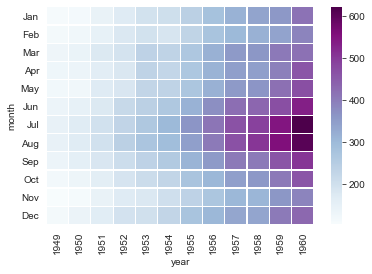

In [16]:
sns.heatmap(flights
            , cmap ='BuPu'
            , linecolor ='white'
            ,linewidth =0.2);

<font color = blue>**REGRESSION PLOTS**
    
<font color = black>Linear Model (lm) plot  
Plot the line of best fit between the tip and total_bill columns as below.

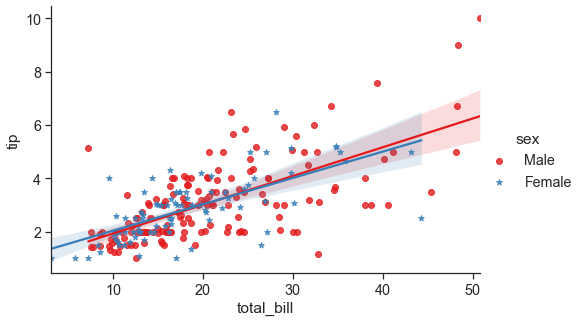

In [17]:
sns.set(font_scale=1.3)
sns.set_style("ticks")
sns.lmplot(x ='total_bill'
           , y ='tip'
           , data=tips
           , hue='sex'
           , aspect =1.5
           , height =4.5
           , palette="Set1"
           , markers =["o","*"]);


There is a lot more that seaborn offers and I shall cover the remainder or may be a subset of the remainder in
furture posts ...
